In [1]:
import torch
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load a pre-trained DeepLabV3 model with a ResNet-50 backbone
model = models.segmentation.deeplabv3_resnet50(pretrained=True)
model.eval()  # Set to evaluation mode


C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [2]:
from torchvision import transforms
from PIL import Image

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load an image
image_path = "img5.jpg"  # Replace with an actual image path
image = Image.open(image_path).convert("RGB")
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_image)["out"][0]  # Get the segmentation output

# Convert output to segmentation map
segmentation_map = torch.argmax(output, dim=0).byte().cpu().numpy()


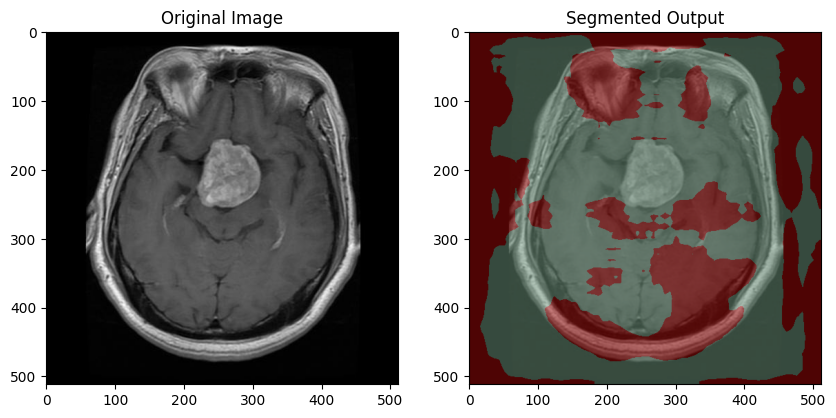

In [3]:
def visualize_segmentation(image, segmentation_map):
    color_map = np.random.randint(0, 255, (21, 3), dtype=np.uint8)  # 21 classes (for COCO dataset)
    color_segmentation = color_map[segmentation_map]

    blended = cv2.addWeighted(np.array(image), 0.5, color_segmentation, 0.5, 0)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(blended)
    plt.title("Segmented Output")
    plt.show()

# Visualize the segmentation
visualize_segmentation(image, segmentation_map)
